# Seaborn Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import env

## Exercises I
### Use the iris database to answer the following quesitons:

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. What does the distribution of petal lengths look like?

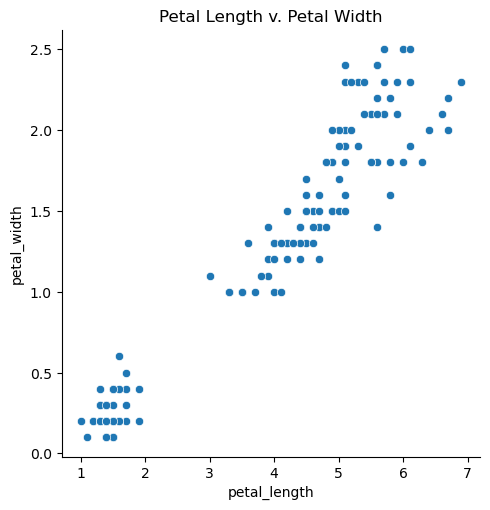

In [3]:
sns.relplot(x = 'petal_length', y = 'petal_width', data = df)
plt.title('Petal Length v. Petal Width')
plt.show()

#### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
There appears to be a strong positive correlation between petal length and width. I would guess at least 0.85.

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
It would be reasonable to predict whether or not an iris is setosa. Versicolor and Virginica are too intermingled with one another to use sepal length v width as a good classification criterion.

In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


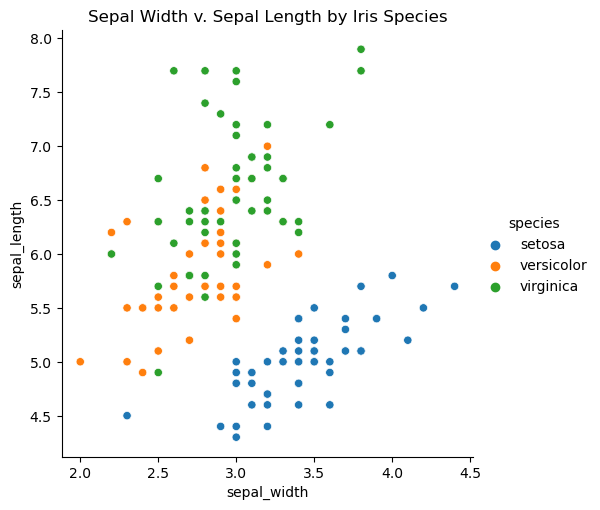

In [5]:
sns.relplot(x = 'sepal_width', y = 'sepal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Sepal Length by Iris Species')
plt.show()


#### 4. Which features would be best used to predict species?
petal_length v petal_width and sepal_width v petal_length seem to produce the best classification groupings between species even though there is still a small amount of overlap.

In [6]:
df.shape

(150, 5)

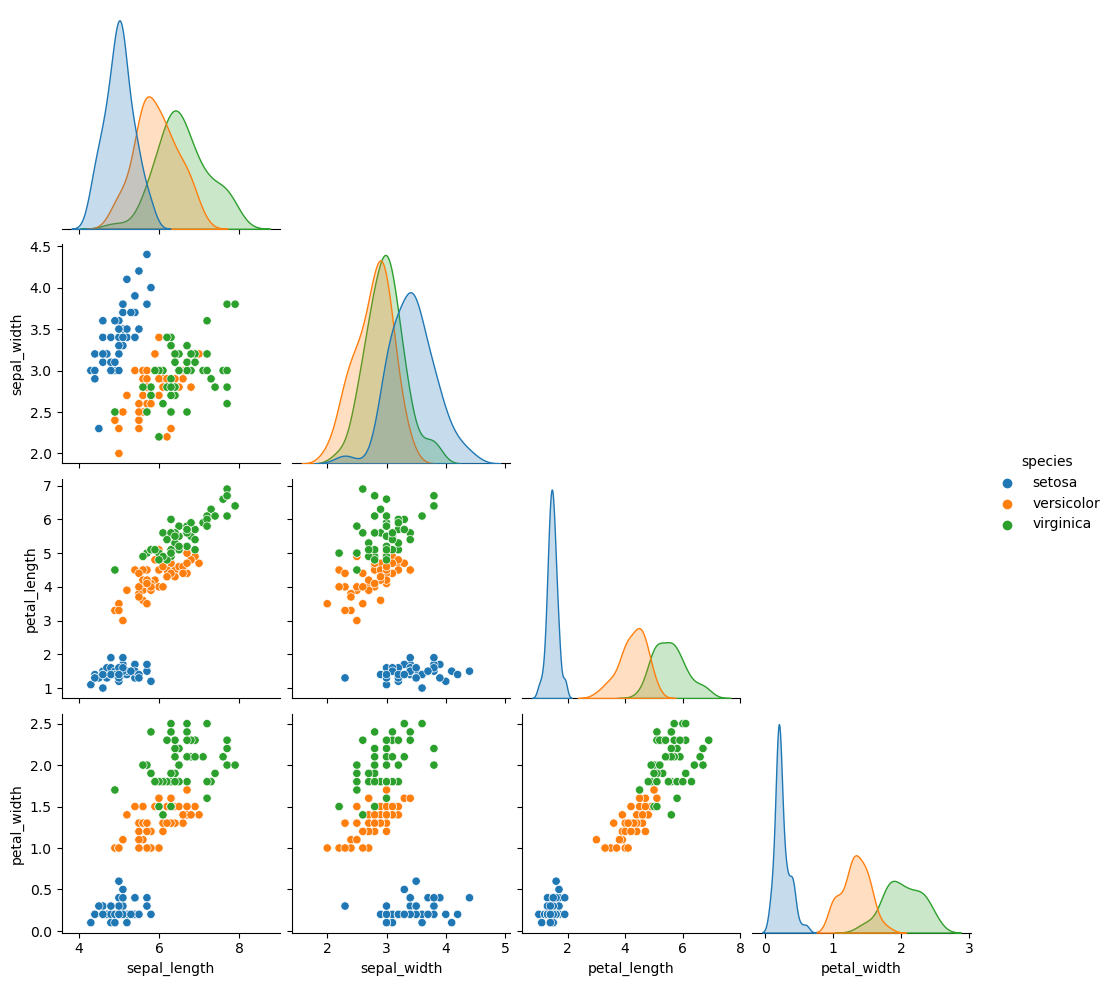

In [7]:
sns.pairplot(df, corner = True, hue = 'species')
plt.show()

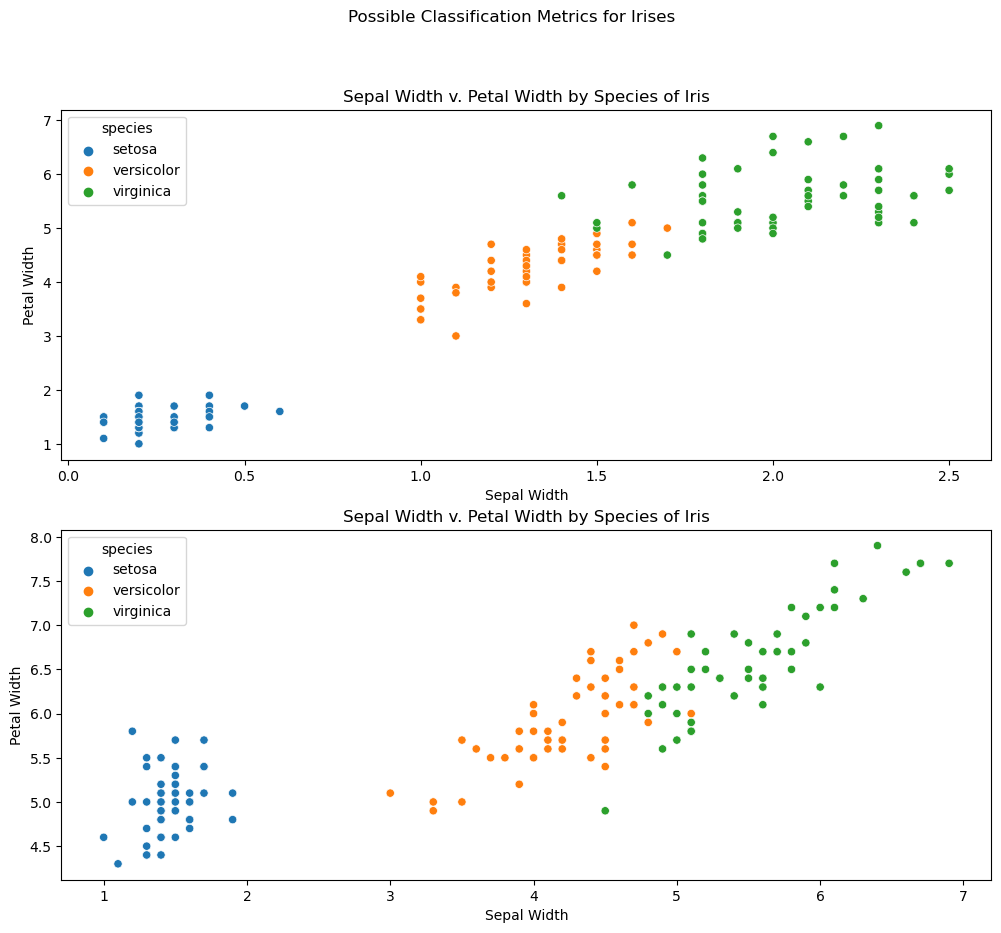

In [8]:
plt.figure(figsize = (12, 10))
plt.suptitle('Possible Classification Metrics for Irises')

plt.subplot(211)
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Petal Width by Species of Iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.subplot(212)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Petal Width by Species of Iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

## Exercises II

#### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
x values are identical in I, II, III, but not IV. However std of x is equal in all groups. The mean is also nearly the same for all groups x and y.

#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


In [9]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [10]:
ans.groupby('dataset').describe().T


dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

In [11]:
ans.groupby('dataset').head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


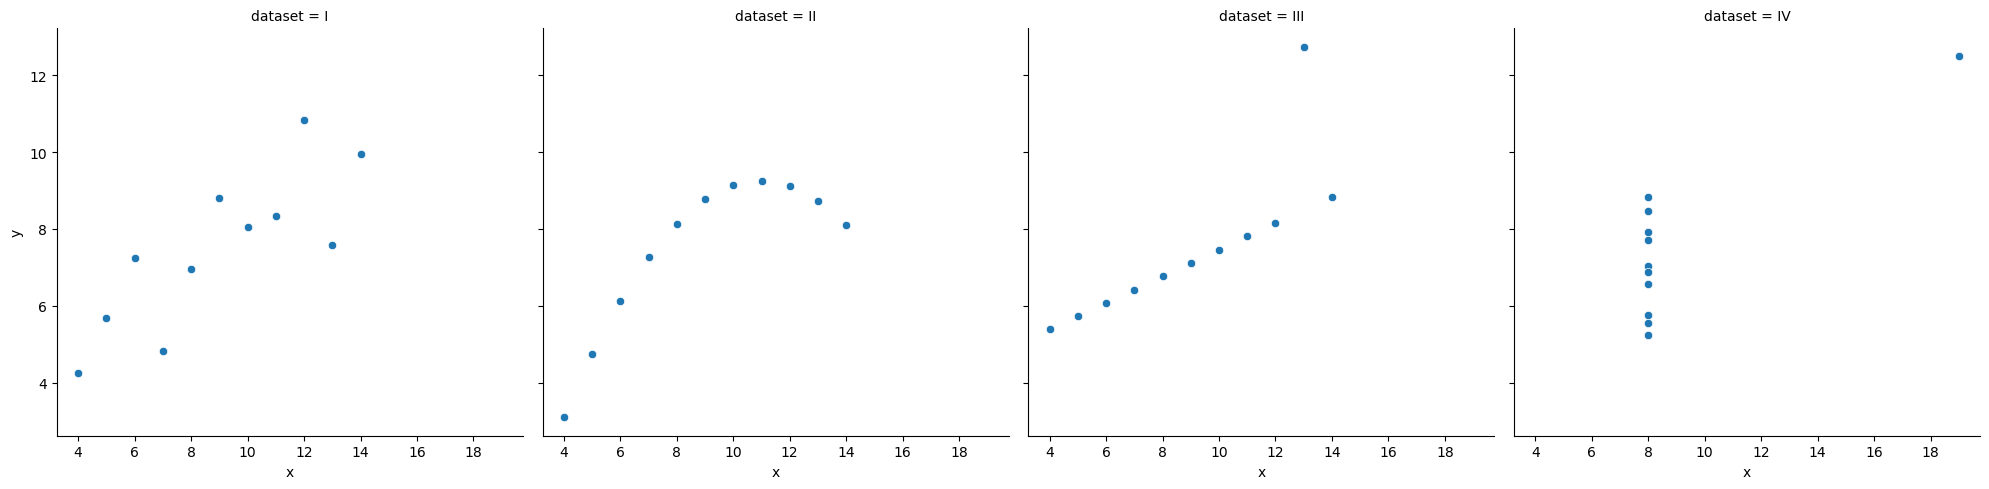

In [12]:
# the easy way

sns.relplot(x = 'x', y = 'y', data = ans, col = 'dataset')
plt.show()

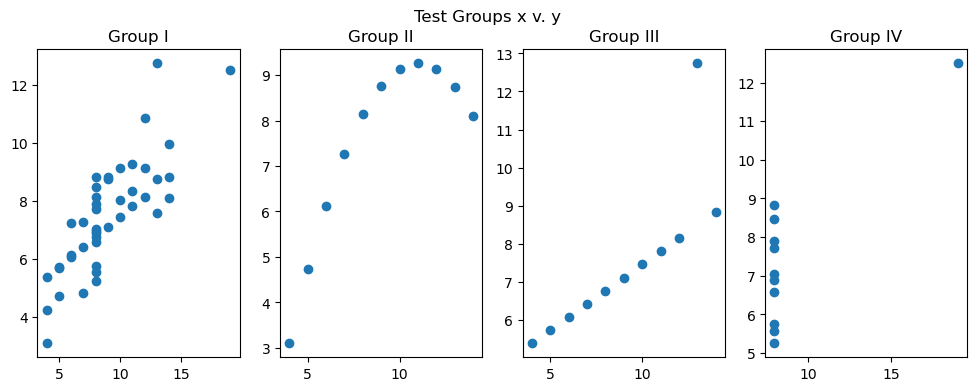

In [13]:
# the hard way

plt.figure(figsize = (12, 4))
plt.suptitle('Test Groups x v. y')

plt.subplot(141)
plt.scatter('x', 'y', data = ans)
plt.title('Group I')

plt.subplot(142)
plt.scatter('x', 'y', data = ans[ans.dataset == 'II'])
plt.title('Group II')

plt.subplot(143)
plt.scatter('x', 'y', data = ans[ans.dataset == 'III'],)
plt.title('Group III')

plt.subplot(144)
plt.scatter('x', 'y', data = ans[ans.dataset == 'IV'],)
plt.title('Group IV')
plt.show()

#### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.



In [14]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [15]:
ins = data('InsectSprays')
ins

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


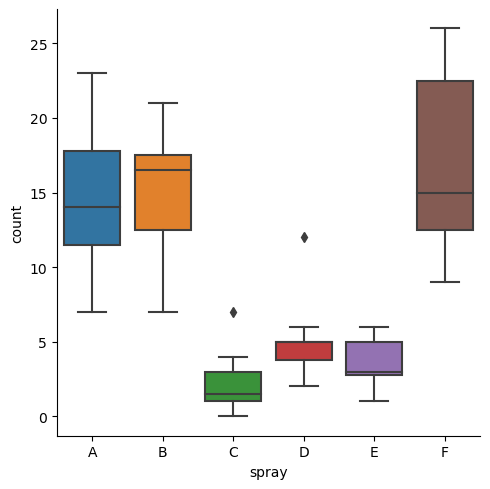

Text(0.5, 1.0, 'Effectiveness of Insect Sprays')

In [16]:
sns.catplot(data = ins, x = 'spray', y = 'count', kind='box')
plt.show()
plt.title('Effectiveness of Insect Sprays')

#### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

Catholic provinces on average have higher fertility by about 10 point on the Standard Fertility Measure.

Score on the examination has a fairly strong inverse correlation with fertility. There also appears to be a lesser, but significant positive correlation between fertility and infant mortality. Catholics had about a 5% higher rate of infant mortality which offset some of their higher fertility. I can't find a clear description of the exact methodology of the fertility measure as it seems to be very antiquated.





In [17]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [18]:
sw = data('swiss')
sw.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [31]:
sw['is_catholic'] = sw['Catholic'] > 60
sw.is_catholic.head(3)

Courtelary      False
Delemont         True
Franches-Mnt     True
Name: is_catholic, dtype: bool

In [20]:
sw.index

Index(['Courtelary', 'Delemont', 'Franches-Mnt', 'Moutier', 'Neuveville',
       'Porrentruy', 'Broye', 'Glane', 'Gruyere', 'Sarine', 'Veveyse', 'Aigle',
       'Aubonne', 'Avenches', 'Cossonay', 'Echallens', 'Grandson', 'Lausanne',
       'La Vallee', 'Lavaux', 'Morges', 'Moudon', 'Nyone', 'Orbe', 'Oron',
       'Payerne', 'Paysd'enhaut', 'Rolle', 'Vevey', 'Yverdon', 'Conthey',
       'Entremont', 'Herens', 'Martigwy', 'Monthey', 'St Maurice', 'Sierre',
       'Sion', 'Boudry', 'La Chauxdfnd', 'Le Locle', 'Neuchatel', 'Val de Ruz',
       'ValdeTravers', 'V. De Geneve', 'Rive Droite', 'Rive Gauche'],
      dtype='object')

In [30]:
str_is_catholic = (sw['Catholic'] > 60).astype('str')

In [22]:
sw.groupby('is_catholic').Fertility.mean()

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

In [23]:
sw.pivot_table(columns = 'is_catholic', values = 'Fertility')

is_catholic,False,True
Fertility,66.22069,76.461111


In [24]:
sw.is_catholic.head()

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Name: is_catholic, dtype: bool

In [25]:
sw.is_catholic.dtype

dtype('bool')

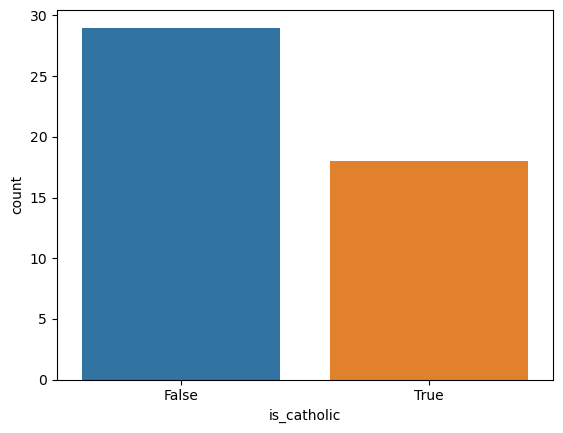

In [26]:
sns.countplot(x = 'is_catholic', data = sw)
plt.title('')
plt.show()

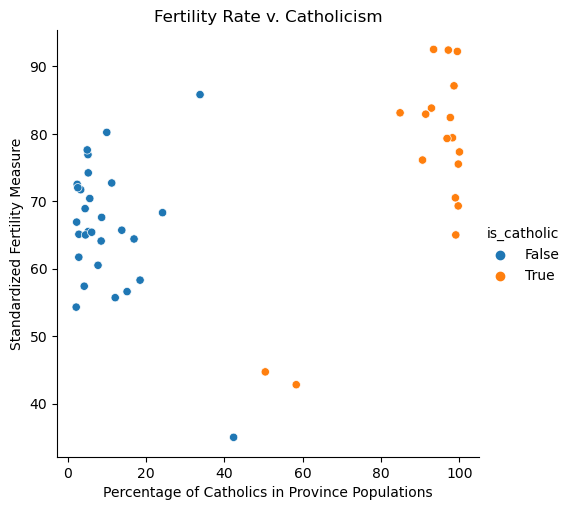

In [27]:
sns.relplot(x='Catholic', y='Fertility', data=sw, hue='is_catholic')
plt.title('Fertility Rate v. Catholicism')
plt.ylabel('Standardized Fertility Measure')
plt.xlabel('Percentage of Catholics in Province Populations')
plt.show()

In [35]:
sw = sw.drop(columns='is_catholic')
sw.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


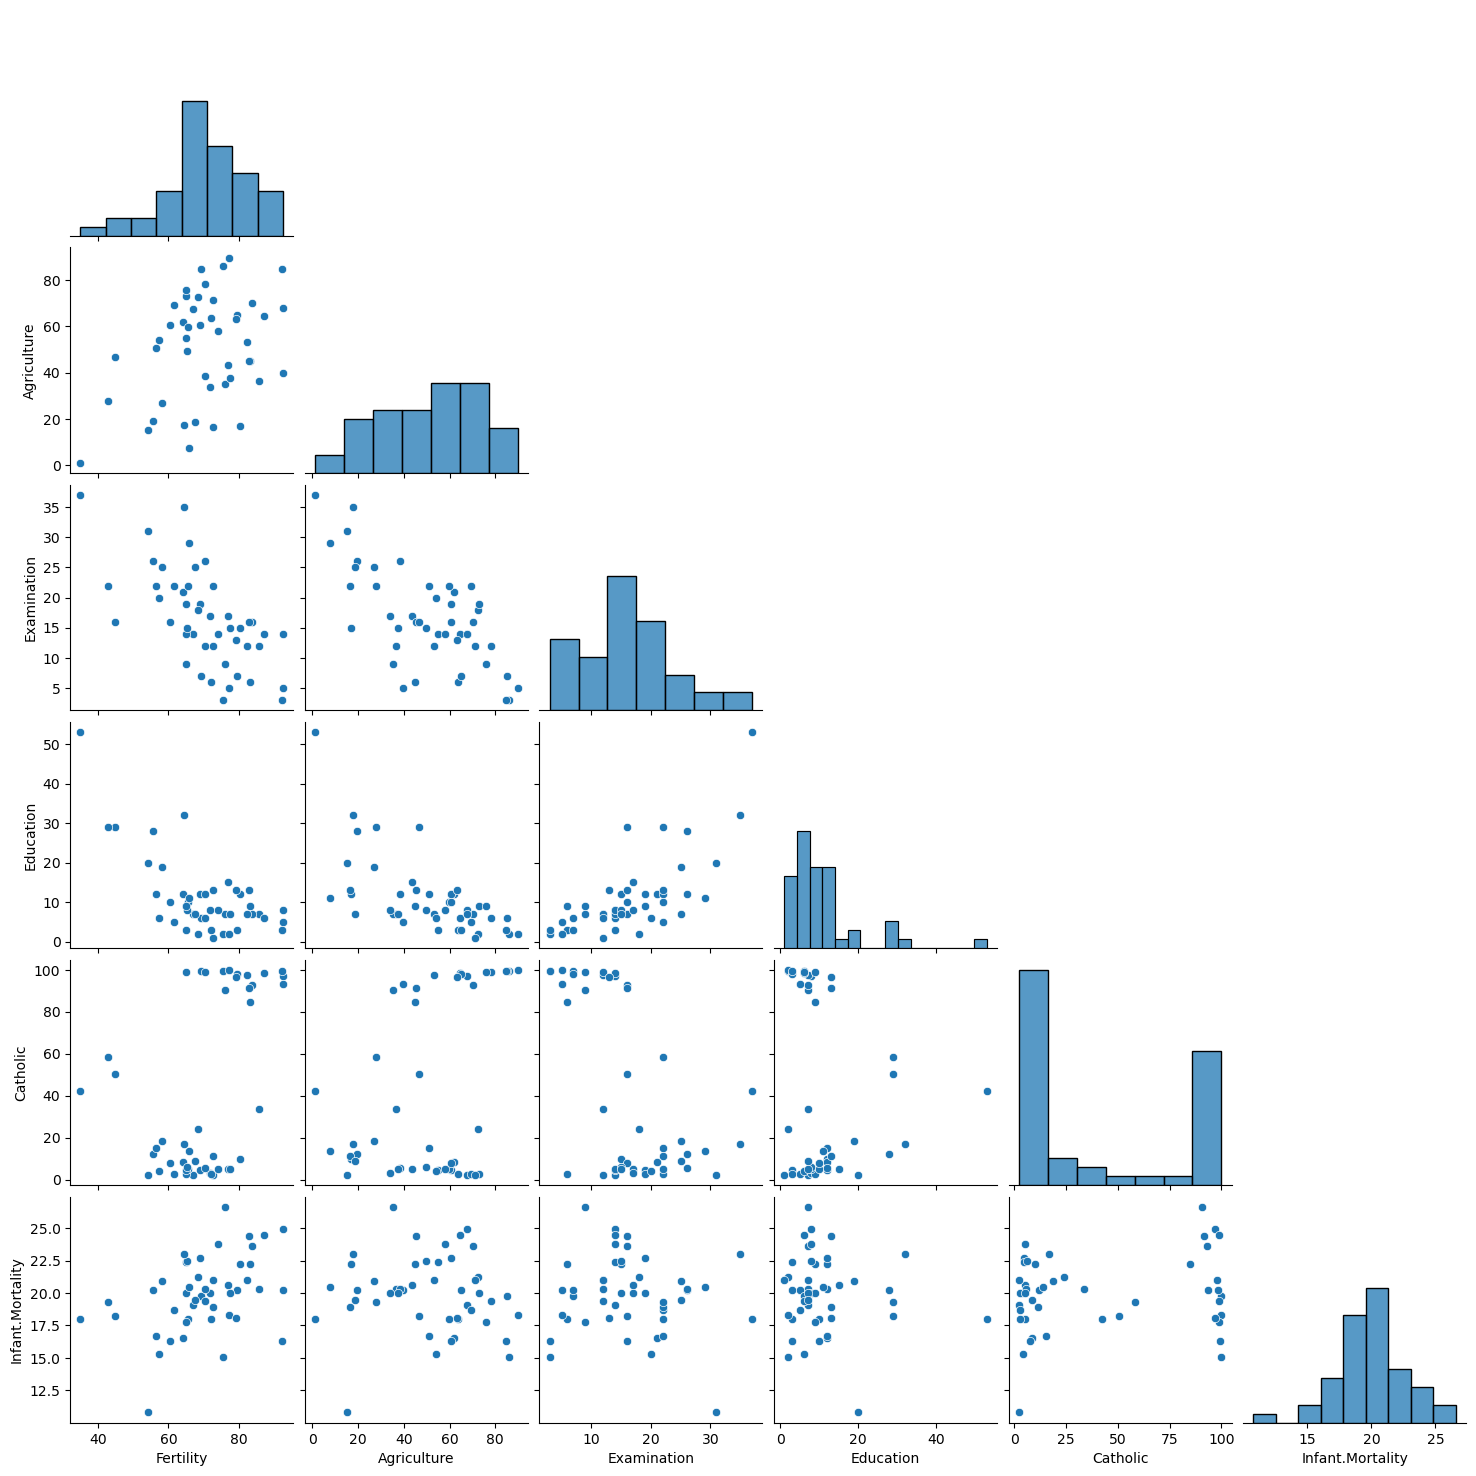

In [37]:
sns.pairplot(data=sw, corner=True)
plt.show()

#### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [38]:
from env import get_db_url

In [41]:
url = get_db_url('chipotle')

In [42]:
chip = pd.read_sql('''
    select * from orders
    ;
    ''', url)

In [43]:
chip.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [46]:
chip.item_name.value_counts().head(4)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Name: item_name, dtype: int64

In [47]:
chip.item_price.dtype

dtype('O')

In [48]:
chip.item_price.str.strip('$').astype('float')

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [53]:
top_items = chip.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)
top_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [55]:
my_top_items = list(top_items.index)

In [57]:
orders_top = chip[chip.item_name.isin(my_top_items)]

In [60]:
orders_top.groupby('item_name').item_price.sum().reset_index

<bound method Series.reset_index of item_name
Chicken Bowl           $16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $11.25 $...
Chicken Burrito        $8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $10.98 $8.75 $8.75 $8.75 $8.75 $8.49 $8.4...
Chips and Guacamole    $4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.99 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $4...
Steak Burrito          $11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $9.25 ...
Name: item_price, dtype: object>

In [62]:
sns.barplot(data=orders_top, x='item_name', y='item_price')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

#### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [63]:
ss = data('sleepstudy')

In [64]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [65]:
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [71]:
# let's force seaborn to interpret subjects
# less numerically as this may force change the color palette):
ss['subject_cat'] = 'Subject: ' + ss.Subject.astype(str)

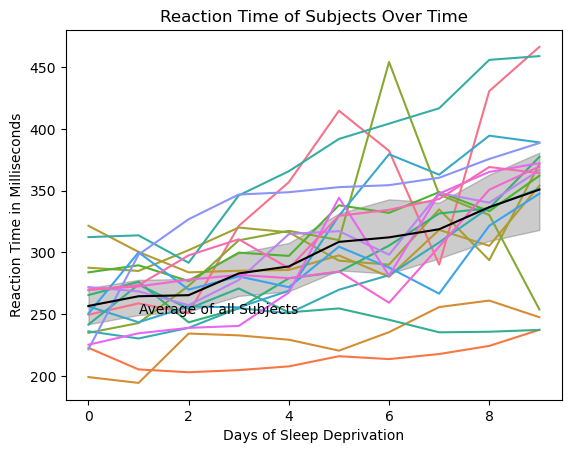

In [78]:
sns.lineplot(x ='Days', y='Reaction', data=ss, hue='subject_cat', legend = False)
sns.lineplot(x='Days', y='Reaction', data=ss, color='black')
plt.title('Reaction Time of Subjects Over Time')
plt.xlabel('Days of Sleep Deprivation')
plt.ylabel('Reaction Time in Milliseconds')
plt.annotate('Average of all Subjects', (1,250))
plt.show()